In [2]:
"""
Magic commands
"""
%matplotlib inline
%load_ext autoreload
%autoreload 2

"""
Python standard packages
"""
import os
import sys
from IPython.display import display, clear_output

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
"""
packages for dataload and simulation
"""
import ffn # data access
from arch import arch_model  # simulation
from arch.univariate import SkewStudent, GARCH, EGARCH, ARX
"""
Own packages
"""
sys.path.insert(0, "C:\\code\\speciale\\") # vesl path
sys.path.insert(0, "C:\\Users\\lucas\\OneDrive\\Skrivebord\\repo\\speciale\\") # ljb path

from stock_simulation_study.stock_environment import StockEnvironment, StockEnvironmentTwo
from stock_simulation_study.stock_agent import RLStockAgent
#==============
from stock_simulation_study.reinforce import REINFORCE_Agent
import time
#==============

import codelib  # used for extending pandas

"""
ignore warnings
"""
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
sns.set_theme(context = "poster", style = "whitegrid")
prices = ffn.get('aapl', start = '2010-01-01')

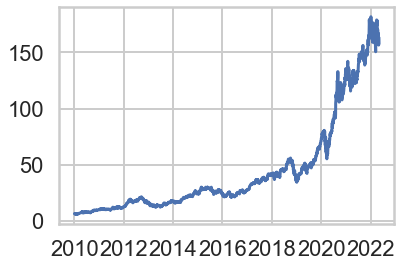

In [4]:
plt.plot(prices)

In [5]:
def position_plot(actions, price, title):
    annotation = pd.DataFrame(actions.values, columns = {"pos"})
    to_join = pd.DataFrame({'col_map': ['red', 'orangered', 'yellow', 'lightgreen', 'green'],
                            'pos': [-2, -1, 0, 1, 2]})
    c = annotation.merge(to_join, on='pos', how='left')["col_map"]
    x = np.linspace(0, len(price), len(price)+1)
    lines = [((x0,y0), (x1,y1)) for x0, y0, x1, y1 in zip(x[:-1], price[:-1], x[1:], price[1:])]
    colored_lines = LineCollection(lines, colors=c, linewidths=(2,))

    fig, ax = plt.subplots(1)
    ax.add_collection(colored_lines)
    ax.autoscale_view()
    plt.title(title)
    plt.show()


In [28]:
n_time_points = 2000
N_EPISODES = 1000
nstocks = 1
lag = 1
env = StockEnvironmentTwo(prices = prices, n_time_points = n_time_points, 
                          price_type = "sim_prices", kappa = 0.000001)
global env

agent = REINFORCE_Agent(state_size=21,
                        action_size=5,
                        discount_rate=0.9,
                        epsilon = 0.01,
                        n_hidden_layers=4, 
                        hidden_layer_size=512,
                        learning_rate=0.00005,
                        mu_zero = False,
                        dropout = 0.1
                       )

Iteration:      1,   Func. Count:      9,   Neg. LLF: 145422.2560674537
Iteration:      2,   Func. Count:     21,   Neg. LLF: 75834.26967944596
Iteration:      3,   Func. Count:     32,   Neg. LLF: 108984.97926351443
Iteration:      4,   Func. Count:     42,   Neg. LLF: 133220.44194119202
Iteration:      5,   Func. Count:     52,   Neg. LLF: 133711.40799113121
Iteration:      6,   Func. Count:     62,   Neg. LLF: 8707.431767138685
Iteration:      7,   Func. Count:     71,   Neg. LLF: 5827.42170602999
Iteration:      8,   Func. Count:     80,   Neg. LLF: 7802.900800661104
Iteration:      9,   Func. Count:     89,   Neg. LLF: 5801.7899584131965
Iteration:     10,   Func. Count:     98,   Neg. LLF: 5791.6164693515775
Iteration:     11,   Func. Count:    107,   Neg. LLF: 5790.193627564522
Iteration:     12,   Func. Count:    116,   Neg. LLF: 5789.035655839109
Iteration:     13,   Func. Count:    124,   Neg. LLF: 5789.021528767886
Iteration:     14,   Func. Count:    132,   Neg. LLF: 5789.0

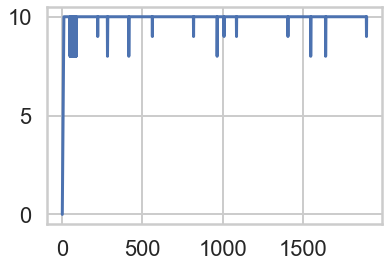

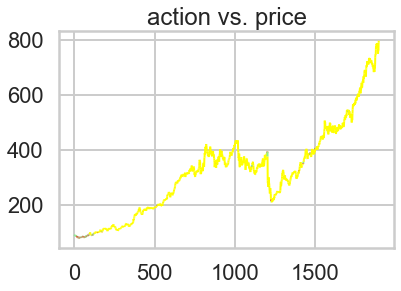

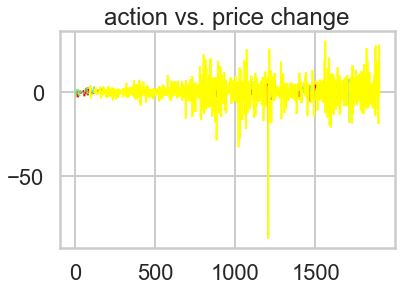

0      40
1       5
2    1760
3      95
Name: 1, dtype: int64
ACT REW 7031.204762435388
REW:  6925.0374270834845


C:\Users\lucas\OneDrive\Skrivebord\repo\speciale\stock_simulation_study\reinforce.py:338: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:
start_time = time.time()
print("Start: %s" % (time.strftime("%H:%M:%S")))
final_results = pd.DataFrame({0: [1], 1: [1], 2: [1], 3: [1], 4: [1]})
for e in range(N_EPISODES):
    agent.run_episode(env=env)
    agent.score_episode(e, N_EPISODES)
    
    if e % 40 == 0:
        
        clear_output()
        position_plot(actions = pd.DataFrame(agent.action_memory)- 2, price = np.array(agent.state_memory)[:,9],
             title = "action vs. price")
        position_plot(actions = pd.DataFrame(agent.action_memory)- 2, price = np.array(agent.state_memory)[:,20],
             title = "action vs. price change")
        unique, counts = np.unique(agent.action_memory, return_counts=True)
        results = pd.DataFrame(np.column_stack((unique, counts)).T)
        final_results = final_results.append(results.iloc[1])
        p = agent.state_memory
        plt.plot(pd.DataFrame(p).iloc[:,0])
        print(results.iloc[1])
        try:
            print("DIFF: ", np.sum(results.iloc[1] * np.array([-2,-1,0,1,2])) - pd.DataFrame(agent.state_memory).iloc[-1,0])
        except:
            pass
        print("ACT REW", np.sum(pd.DataFrame(agent.state_memory)[0] * np.array(agent.state_memory)[:,-1]))
        print("REW: ", agent.results[-1])
#     if e and (e+1) % agent.save_interval == 0:
#         agent.save()

elapsed_time = time.time() - start_time
print("\nTrain time: ", elapsed_time)

In [43]:
np.random.choice(np.array([1,2,3,4,5])[:3], p = [0,0,1])

3

In [26]:
na=float('nan')
np.any(np.isnan([na,na,na]))

True

In [23]:
#np.random.choice([1,2], p = [0.1, 0.2])
np.array([0.4, 0.1])/0.5

array([0.8, 0.2])

In [26]:
np.array(agent.state_memory).shape

TensorFlow 2.8.0
Keras 2.8.0
plotly 5.7.0
pandas 1.4.2
numpy 1.22.3


(749, 21)

In [100]:
env.am_params

Const       0.071636
spy[1]     -0.068058
omega       0.014471
alpha[1]    0.128824
beta[1]     0.866017
eta         6.798308
lambda     -0.128646
Name: params, dtype: float64

In [54]:
unique, counts = np.unique(agent.action_memory, return_counts=True)
result = np.column_stack((unique, counts)) 
print(result)

[[  0  26]
 [  1  20]
 [  2  22]
 [  3 932]]


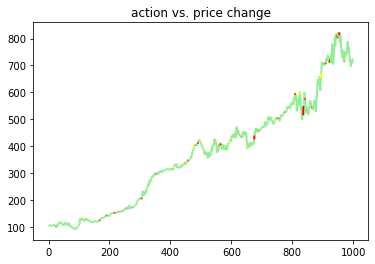

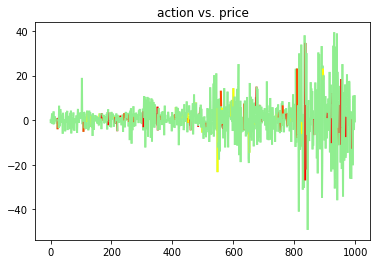

In [60]:
position_plot(actions = pd.DataFrame(agent.action_memory)- 2, price = np.array(agent.state_memory)[:,0],
             title = "action vs. price change")
position_plot(actions = pd.DataFrame(agent.action_memory)- 2, price = np.array(agent.state_memory)[:,1],
             title = "action vs. price")

In [35]:
agent.rlplot("Training Progress: Simple Harmonic Motion")

In [3]:
prices = ffn.get('aapl', start = '2018-01-01')

In [21]:
agent.results

[-204.75328336484114,
 -626811.488589281,
 -31348.798846286743,
 -192777.9647423348,
 -1945184.7080952055,
 -1577022.6772607751,
 -13231526.209301678,
 -101564377.73354799,
 -324904747.8821427,
 -192900209.3154986,
 -930641077.4280161,
 -296372772.5797036,
 -491582256.2839721,
 -545160504.09667]

In [1102]:
# initialize market
n_time_points = 1000
env = StockEnvironment(prices = prices, n_time_points = n_time_points)
env.simulate_prices()
agent_params = {"n_layers": 2, "n_units": 16, "n_features": 2, "batch_size": 1,
                                        "dense_units": 1, "n_timepoints": 16, "n_epochs": 50}
agent = RLStockAgent(epsilon = 0.1, nn_parameters = agent_params)
for episode in range(1):
    state, reward = env.reset()
#     for i in range(100):
#         action = 0
#         state, reward = env.step(action = action)
    for i in range(n_time_points):
        state, reward = env.step(action = action)
        agent.update(state, reward, random_action = True)
        action = agent.position

agent.train_model()
#agent.reset_data()

Iteration:      1,   Func. Count:     13,   Neg. LLF: 9067.116520986934
Iteration:      2,   Func. Count:     29,   Neg. LLF: 59647.887185441556
Iteration:      3,   Func. Count:     45,   Neg. LLF: 42310.134861608436
Iteration:      4,   Func. Count:     61,   Neg. LLF: 64037.799845733054
Iteration:      5,   Func. Count:     76,   Neg. LLF: 29897.61131514558
Iteration:      6,   Func. Count:     90,   Neg. LLF: 30172.708662404104
Iteration:      7,   Func. Count:    104,   Neg. LLF: 51858.84206016213
Iteration:      8,   Func. Count:    119,   Neg. LLF: 31938.387292510022
Iteration:      9,   Func. Count:    133,   Neg. LLF: 51623.33048718967
Iteration:     10,   Func. Count:    147,   Neg. LLF: 3255.454092518141
Iteration:     11,   Func. Count:    160,   Neg. LLF: 3997.319233109724
Iteration:     12,   Func. Count:    174,   Neg. LLF: 2193.200863152285
Iteration:     13,   Func. Count:    187,   Neg. LLF: 2136.668687237723
Iteration:     14,   Func. Count:    199,   Neg. LLF: 2136.

[====================] 100%Epoch 1/50
4124/4124 - 14s - loss: 3.2904e-04
Epoch 2/50
4124/4124 - 14s - loss: 3.3221e-04
Epoch 3/50
4124/4124 - 14s - loss: 2.9298e-04
Epoch 4/50
4124/4124 - 14s - loss: 3.5008e-04
Epoch 5/50
4124/4124 - 14s - loss: 3.2437e-04
Epoch 6/50
4124/4124 - 14s - loss: 3.3529e-04
Epoch 7/50
4124/4124 - 14s - loss: 2.8202e-04
Epoch 8/50
4124/4124 - 14s - loss: 3.1428e-04
Epoch 9/50
4124/4124 - 14s - loss: 2.9425e-04
Epoch 10/50
4124/4124 - 14s - loss: 2.9707e-04
Epoch 11/50
4124/4124 - 14s - loss: 3.5698e-04
Epoch 12/50
4124/4124 - 14s - loss: 2.8826e-04
Epoch 13/50
4124/4124 - 14s - loss: 2.9864e-04
Epoch 14/50
4124/4124 - 14s - loss: 2.8975e-04
Epoch 15/50
4124/4124 - 15s - loss: 3.0028e-04
Epoch 16/50
4124/4124 - 14s - loss: 3.2648e-04
Epoch 17/50
4124/4124 - 14s - loss: 2.9864e-04
Epoch 18/50
4124/4124 - 14s - loss: 3.3257e-04
Epoch 19/50
4124/4124 - 14s - loss: 3.0724e-04
Epoch 20/50
4124/4124 - 15s - loss: 2.8548e-04
Epoch 21/50
4124/4124 - 15s - loss: 3.0685

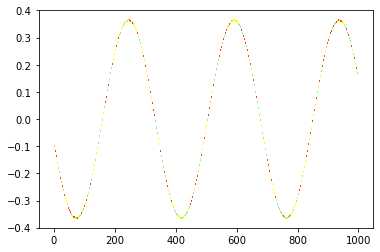

82.44615229397104


In [1104]:
plt_data = np.ndarray(shape = (0, 6))
for episode in range(1):
    state, reward = env.reset()

#     for i in range(80):
#         agent.position = 0
#         action = agent.position
#         state, reward = env.step(action)
#         if i > 2:
#             agent.store_data(state)
    agent_reward = 0
    preds_diff = 0

    for time in range(n_time_points):
        state, reward = env.step(action)
        agent.update(state, reward, random_action = False)
        action = agent.position
        agent_reward += reward
        j = (time + 1) / (n_time_points)
        sys.stdout.write('\r')
        sys.stdout.write("[%-20s] %d%%" % ('='*int(20*j), 100*j))
        preds_diff += np.abs(agent.predicted_reward - reward)
    env.reset()
    agent.train_model()
    plt_data = np.vstack((plt_data, agent.data))
    print("total reward: ", agent_reward)
    print("predicte rew: ", preds_diff)
    
    annotation = pd.DataFrame(agent.data[:,-2], columns = {"pos"})
    to_join = pd.DataFrame({'col_map': ['red', 'orangered', 'yellow', 'lightgreen', 'green'],
                            'pos': [-2, -1, 0, 1, 2]})
    c = annotation.merge(to_join, on='pos', how='left')["col_map"]
    x = np.linspace(0, agent.data[-n_time_points:,:].shape[0], agent.data[-n_time_points:,:].shape[0]+1)
    lines = [((x0,y0), (x1,y1)) for x0, y0, x1, y1 in zip(x[:-1], agent.data[-n_time_points:-1, -3], x[1:], agent.data[-n_time_points:, -3])]
    colored_lines = LineCollection(lines, colors=c, linewidths=(2,))

    fig, ax = plt.subplots(1)
    ax.add_collection(colored_lines)
    ax.autoscale_view()
    plt.show()

    print(agent.data[-n_time_points:,-1].sum())
    #agent.reset_data()


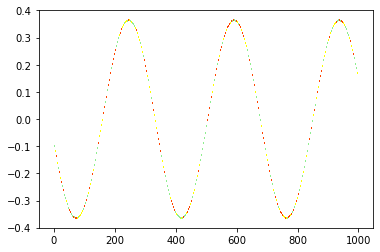

63.45814048967269


In [940]:
annotation = pd.DataFrame(agent.data[:,-2], columns = {"pos"})
to_join = pd.DataFrame({'col_map': ['red', 'orangered', 'yellow', 'lightgreen', 'green'],
                        'pos': [-2, -1, 0, 1, 2]})
c = annotation.merge(to_join, on='pos', how='left')["col_map"]
x = np.linspace(0, agent.data[-n_time_points:,:].shape[0], agent.data[-n_time_points:,:].shape[0]+1)
lines = [((x0,y0), (x1,y1)) for x0, y0, x1, y1 in zip(x[:-1], agent.data[-n_time_points:-1, -3], x[1:], agent.data[-n_time_points:, -3])]
colored_lines = LineCollection(lines, colors=c, linewidths=(2,))

fig, ax = plt.subplots(1)
ax.add_collection(colored_lines)
ax.autoscale_view()
plt.show()

In [1053]:
unique, counts = np.unique(plt_data[:,-2], return_counts=True)
result = np.column_stack((unique, counts/np.sum(counts))) 
print(result)

[[-1.          0.43603333]
 [ 0.          0.25622222]
 [ 1.          0.30774444]]


In [822]:
pd.DataFrame(plt_data, columns = ['ma1', 'ma2', 'trend_feature',
                                  'market_prices', 'position', 'reward']).to_feather('data/data_test.feather')